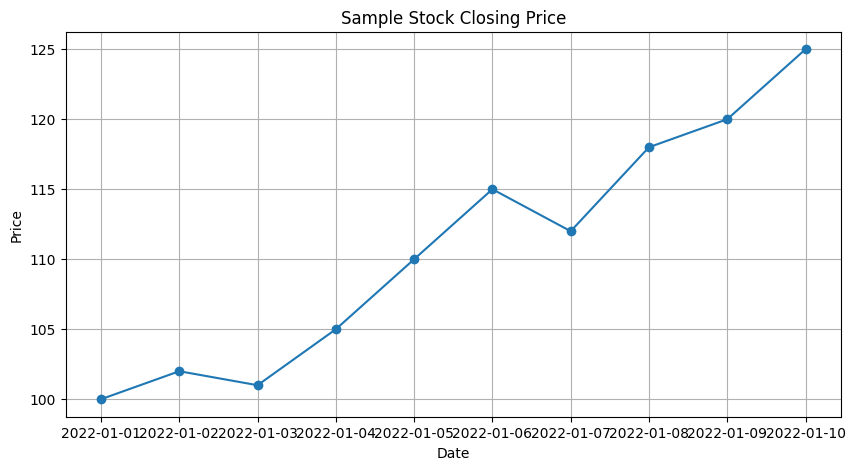

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample stock price data
data = {
    'Date': pd.date_range(start='2022-01-01', periods=10, freq='D'),
    'Close': [100, 102, 101, 105, 110, 115, 112, 118, 120, 125]
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(10,5))
plt.plot(df['Close'], marker='o')
plt.title('Sample Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

def generate_synthetic_intraday_data(daily_df, interval_minutes=5):
    """
    Generate synthetic intraday OHLCV data from daily OHLCV data.
    
    daily_df: DataFrame with ['Open', 'High', 'Low', 'Close', 'Volume']
    interval_minutes: timeframe in minutes for each candle
    
    Returns DataFrame indexed by datetime with OHLCV columns.
    """
    all_intraday = []

    # Define trading day minutes: 9:15 AM to 3:30 PM (375 minutes)
    total_minutes = 6*60 + 15
    candles_per_day = total_minutes // interval_minutes

    for date, row in daily_df.iterrows():
        date_str = date.strftime('%Y-%m-%d')
        times = pd.date_range(start=f"{date_str} 09:15", periods=candles_per_day, freq=f"{interval_minutes}min")
        
        # Linear prices from open to close
        prices = np.linspace(row['Open'], row['Close'], candles_per_day)
        
        # Add noise for volatility
        noise = np.random.normal(scale=0.2, size=prices.shape)
        noisy_prices = prices + noise
        noisy_prices = np.maximum(noisy_prices, 0.01)

        # Construct OHLC candles with matching shapes
        o = noisy_prices[:-1]  # length N-1
        c = noisy_prices[1:]   # length N-1

        # Generate independent noise for high and low
        high_noise = np.random.uniform(0, 0.3, size=o.shape)
        low_noise = np.random.uniform(0, 0.3, size=o.shape)

        h = np.maximum(o, c) + high_noise
        l = np.minimum(o, c) - low_noise
        l = np.maximum(l, 0.01)

        # Volume distribution scaled from daily volume
        daily_vol = row.get('Volume', 1_000_000)
        avg_vol = daily_vol / (candles_per_day - 1)
        vol = np.random.normal(loc=avg_vol, scale=avg_vol * 0.3, size=avg_vol.shape if hasattr(avg_vol, 'shape') else (candles_per_day - 1,))
        vol = np.maximum(vol, 1)
        
        # Random volume spikes
        spike_count = max(1, int(0.05 * (candles_per_day - 1)))
        spike_indices = np.random.choice(range(candles_per_day - 1), size=spike_count, replace=False)
        spike_multipliers = np.random.uniform(3, 6, size=spike_count)
        for idx, mult in zip(spike_indices, spike_multipliers):
            vol[idx] *= mult
        vol = vol.astype(int)

        intraday_df = pd.DataFrame({
            'Open': o,
            'High': h,
            'Low': l,
            'Close': c,
            'Volume': vol
        }, index=times[1:])
        
        all_intraday.append(intraday_df)

    return pd.concat(all_intraday)

# Example usage:

# Download recent 20 days daily data for TCS (NSE)
daily_data = yf.download('TCS.NS', period='20d')

# Generate synthetic 5-min intraday data
intraday_data = generate_synthetic_intraday_data(daily_data)

# Show first few rows
print(intraday_data.head(10))


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


IndexError: index 18 is out of bounds for axis 0 with size 1

In [5]:
import os
import pandas as pd
import numpy as np
import yfinance as yf

# Set the correct project directory path
project_path = r'C:\Users\rupan\newTry\financial-advisor'
data_dir = os.path.join(project_path, 'data')

# Ensure data directory exists (though you said it already exists)
os.makedirs(data_dir, exist_ok=True)

# Your existing generate_synthetic_intraday_data function
def generate_synthetic_intraday_data(daily_df, interval_minutes=5):
    """
    Generate synthetic intraday OHLCV data from daily OHLCV data.
    
    daily_df: DataFrame with ['Open', 'High', 'Low', 'Close', 'Volume']
    interval_minutes: timeframe in minutes for each candle
    
    Returns DataFrame indexed by datetime with OHLCV columns.
    """
    all_intraday = []

    # Define trading day minutes: 9:15 AM to 3:30 PM (375 minutes)
    total_minutes = 6*60 + 15
    candles_per_day = total_minutes // interval_minutes

    for date, row in daily_df.iterrows():
        date_str = date.strftime('%Y-%m-%d')
        times = pd.date_range(start=f"{date_str} 09:15", periods=candles_per_day, freq=f"{interval_minutes}min")
        
        # Linear interpolate prices from open to close
        prices = np.linspace(row['Open'], row['Close'], candles_per_day)
        
        # Add noise for price volatility
        noise = np.random.normal(scale=0.2, size=prices.shape)
        noisy_prices = prices + noise
        noisy_prices = np.maximum(noisy_prices, 0.01)

        # Create OHLC candle data - ensure all are 1D arrays
        o = noisy_prices[:-1].flatten()
        c = noisy_prices[1:].flatten()

        high_noise = np.random.uniform(0, 0.3, size=o.shape)
        low_noise = np.random.uniform(0, 0.3, size=o.shape)

        h = (np.maximum(o, c) + high_noise).flatten()
        l = (np.minimum(o, c) - low_noise).flatten()
        l = np.maximum(l, 0.01)

        # Volume distribution based on daily volume, ensure proper shape
        total_volume = row.get('Volume', 1_000_000)
        num_candles = candles_per_day - 1
        avg_vol = total_volume / num_candles

        vol = np.random.normal(loc=avg_vol, scale=avg_vol * 0.3, size=num_candles)
        vol = np.maximum(vol, 1)

        # Add volume spikes
        spike_count = max(1, int(0.05 * num_candles))
        spike_indices = np.random.choice(range(num_candles), size=spike_count, replace=False)
        spike_multipliers = np.random.uniform(3, 6, size=spike_count)
        for idx, mult in zip(spike_indices, spike_multipliers):
            vol[idx] *= mult

        vol = vol.astype(int).flatten()  # Ensure 1D array

        # Verify all arrays have the same length
        assert len(o) == len(h) == len(l) == len(c) == len(vol), "Array length mismatch"

        intraday_df = pd.DataFrame({
            'Open': o,
            'High': h,
            'Low': l,
            'Close': c,
            'Volume': vol
        }, index=times[1:])
        
        all_intraday.append(intraday_df)

    return pd.concat(all_intraday)

# Download last 20 days daily data for TCS (NSE)
daily_data = yf.download('TCS.NS', period='20d')

# Generate synthetic intraday data
intraday_data = generate_synthetic_intraday_data(daily_data)

# Display results
print("First 10 rows of synthetic intraday data:")
print(intraday_data.head(10))
print(f"\nDataset shape: {intraday_data.shape}")
print(f"Date range: {intraday_data.index.min()} to {intraday_data.index.max()}")

# Save to the specific project directory path
csv_path = os.path.join(data_dir, 'tcs_synthetic_5min.csv')
intraday_data.to_csv(csv_path)
print(f"✅ Data saved successfully to: {csv_path}")


[*********************100%***********************]  1 of 1 completed

First 10 rows of synthetic intraday data:
                            Open         High          Low        Close  \
2025-08-18 09:20:00  3046.407153  3046.470289  3046.158129  3046.269968   
2025-08-18 09:25:00  3046.269968  3046.418233  3045.533911  3045.622626   
2025-08-18 09:30:00  3045.622626  3045.859839  3044.788145  3045.050675   
2025-08-18 09:35:00  3045.050675  3045.058699  3044.152878  3044.432040   
2025-08-18 09:40:00  3044.432040  3044.652170  3043.883337  3044.143798   
2025-08-18 09:45:00  3044.143798  3044.364088  3043.436750  3043.596064   
2025-08-18 09:50:00  3043.596064  3043.648111  3042.972231  3043.110494   
2025-08-18 09:55:00  3043.110494  3043.339489  3042.346042  3042.591182   
2025-08-18 10:00:00  3042.591182  3042.758680  3042.188683  3042.291864   
2025-08-18 10:05:00  3042.291864  3042.293336  3041.517802  3041.607692   

                     Volume  
2025-08-18 09:20:00   47904  
2025-08-18 09:25:00   32300  
2025-08-18 09:30:00   27892  
2025-08-18 0

In [7]:
import sys
import os
import pandas as pd

# Fix import path for project structure
notebook_dir = os.getcwd()
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"✅ Added to path: {project_root}")

# Import indicators 
from indicators.trend_indicators import calculate_sma, calculate_ema, calculate_macd

# Load your saved data
data_path = os.path.join(project_root, 'data', 'tcs_synthetic_5min.csv')
data = pd.read_csv(data_path, index_col=0, parse_dates=True)

print(f"✅ Data loaded successfully from: {data_path}")
print(f"Data shape: {data.shape}")
print(f"Data columns: {data.columns.tolist()}")

# Test technical indicators
print("\n=== Testing Technical Indicators ===")

# Calculate SMA and EMA
sma_20 = calculate_sma(data['Close'], 20)
ema_20 = calculate_ema(data['Close'], 20)

print("SMA(20) last 5 values:")
print(sma_20.tail())

print("\nEMA(20) last 5 values:")
print(ema_20.tail())

# Calculate MACD
macd_data = calculate_macd(data['Close'])
print("\nMACD last 5 values:")
print(macd_data['macd'].tail())

print("\n✅ All indicators calculated successfully!")


✅ Added to path: c:\Users\rupan\newTry\financial-advisor
✅ Data loaded successfully from: c:\Users\rupan\newTry\financial-advisor\data\tcs_synthetic_5min.csv
Data shape: (1480, 5)
Data columns: ['Open', 'High', 'Low', 'Close', 'Volume']

=== Testing Technical Indicators ===
SMA(20) last 5 values:
2025-09-12 15:05:00    3135.391686
2025-09-12 15:10:00    3135.257258
2025-09-12 15:15:00    3135.112196
2025-09-12 15:20:00    3134.970858
2025-09-12 15:25:00    3134.846566
Name: Close, dtype: float64

EMA(20) last 5 values:
2025-09-12 15:05:00    3135.350006
2025-09-12 15:10:00    3135.227250
2025-09-12 15:15:00    3135.085069
2025-09-12 15:20:00    3134.936307
2025-09-12 15:25:00    3134.832458
Name: Close, dtype: float64

MACD last 5 values:
2025-09-12 15:05:00   -0.920592
2025-09-12 15:10:00   -0.910302
2025-09-12 15:15:00   -0.917929
2025-09-12 15:20:00   -0.930298
2025-09-12 15:25:00   -0.903635
Name: Close, dtype: float64

✅ All indicators calculated successfully!


In [8]:
# Import momentum indicators
from indicators.momentum_indicators import calculate_rsi, calculate_stochastic, calculate_bollinger_bands

# Calculate momentum indicators
rsi = calculate_rsi(data['Close'])
stochastic = calculate_stochastic(data['High'], data['Low'], data['Close'])
bollinger = calculate_bollinger_bands(data['Close'])

print("=== Momentum Indicators Test ===")
print("RSI last 5 values:")
print(rsi.tail())

print("\nStochastic %K last 5 values:")
print(stochastic['K'].tail())

print("\nBollinger Bands last 5 values:")
print("Upper:", bollinger['upper'].tail().iloc[-1])
print("Middle:", bollinger['middle'].tail().iloc[-1]) 
print("Lower:", bollinger['lower'].tail().iloc[-1])
print("Current Price:", data['Close'].tail().iloc[-1])


=== Momentum Indicators Test ===
RSI last 5 values:
2025-09-12 15:05:00    27.988914
2025-09-12 15:10:00    34.398887
2025-09-12 15:15:00    33.001441
2025-09-12 15:20:00    28.818148
2025-09-12 15:25:00    36.971516
Name: Close, dtype: float64

Stochastic %K last 5 values:
2025-09-12 15:05:00     1.806054
2025-09-12 15:10:00    15.670426
2025-09-12 15:15:00     6.562378
2025-09-12 15:20:00     1.818795
2025-09-12 15:25:00    14.737771
dtype: float64

Bollinger Bands last 5 values:
Upper: 3136.577673250371
Middle: 3134.8465662549665
Lower: 3133.115459259562
Current Price: 3133.8458906743044


In [15]:
import sys
import os

# Add project root to path
notebook_dir = os.getcwd()
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.append(project_root)

# Test import
try:
    from indicators.volume_indicators import calculate_volume_sma
    print("✅ Import successful!")
except Exception as e:
    print(f"❌ Import failed: {e}")


❌ Import failed: cannot import name 'calculate_volume_sma' from 'indicators.volume_indicators' (c:\Users\rupan\newTry\financial-advisor\indicators\volume_indicators.py)


In [16]:
import pandas as pd
import numpy as np

def calculate_volume_sma(volume, window=20):
    return volume.rolling(window=window).mean()

def test_function():
    return "Volume indicators working!"


In [17]:
import sys
import os

notebook_dir = os.getcwd()
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.append(project_root)

try:
    from indicators.volume_indicators import test_function
    print("✅ Minimal import successful!")
    print(test_function())
except Exception as e:
    print(f"❌ Still failing: {e}")


❌ Still failing: cannot import name 'test_function' from 'indicators.volume_indicators' (c:\Users\rupan\newTry\financial-advisor\indicators\volume_indicators.py)


In [18]:
cd C:\Users\rupan\newTry\financial-advisor

C:\Users\rupan\newTry\financial-advisor


In [20]:
import pandas as pd
import numpy as np

def calculate_volume_sma(volume, window=20):
    return volume.rolling(window=window).mean()

def calculate_on_balance_volume(close, volume):
    obv = pd.Series(index=close.index, dtype=float)
    obv.iloc[0] = volume.iloc[0]
    
    for i in range(1, len(close)):
        if close.iloc[i] > close.iloc[i-1]:
            obv.iloc[i] = obv.iloc[i-1] + volume.iloc[i]
        elif close.iloc[i] < close.iloc[i-1]:
            obv.iloc[i] = obv.iloc[i-1] - volume.iloc[i]
        else:
            obv.iloc[i] = obv.iloc[i-1]
    
    return obv

# Test with your data
data_path = r'C:\Users\rupan\newTry\financial-advisor\data\tcs_synthetic_5min.csv'
data = pd.read_csv(data_path, index_col=0, parse_dates=True)

vol_sma = calculate_volume_sma(data['Volume'])
obv = calculate_on_balance_volume(data['Close'], data['Volume'])

print("✅ Volume indicators working directly!")
print(f"Current volume SMA: {vol_sma.tail().iloc[-1]:.0f}")


✅ Volume indicators working directly!
Current volume SMA: 22832
